In [ ]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 28.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import mglearn

In [ ]:
url = "https://raw.githubusercontent.com/KhalPrawira/Machine-Learning-Course/refs/heads/main/01.%20Week%201/Dataset/Automobile.csv"
df = pd.read_csv(url)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

In [ ]:
df.isnull().sum()

,0
price,0
highway-mpg,0
city-mpg,0
peak-rpm,0
horsepower,0
compression-ratio,0
stroke,0
bore,0
fuel-system,0
engine-size,0


In [ ]:
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)

Total missing values: 0


**Cleaning**

In [ ]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df_check = df.isnull().sum()
print(df_check)
total_missing = df.isnull().sum().sum()
print("Total missing values:", total_missing)

price                0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
normalized-losses    0
symboling            0
dtype: int64
Total missing values: 0


1. Buat model Linear Model Machine Learning (scikitlearn and mglearn). Target variable symboling.

In [ ]:
X = df.drop(columns=["symboling"])
y = df["symboling"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

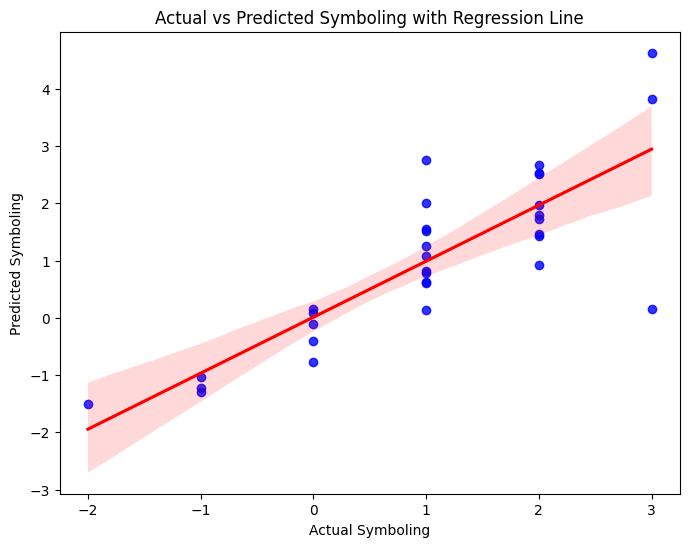

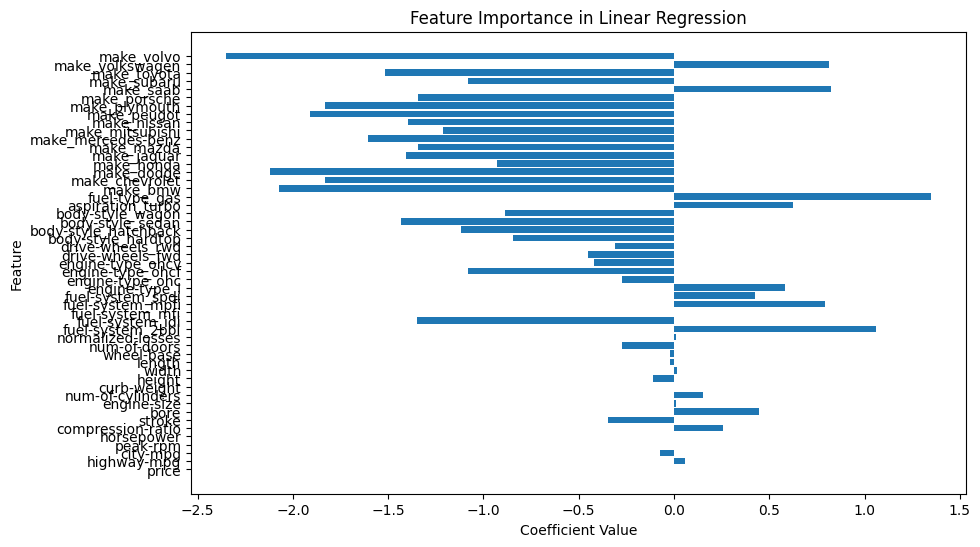

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Symboling")
plt.ylabel("Predicted Symboling")
plt.title("Actual vs Predicted Symboling with Regression Line")
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.coef_)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Linear Regression")
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred) # Mean Squared Error (MSE) = (1/n) * Σ(aktual - prediksi)^2
rmse = np.sqrt(mse) # Root Mean Squared Error (RMSE) = √MSE
r2 = r2_score(y_test, y_pred) # R-squared (R²) = 1 - (Σ(aktual - prediksi)^2 / Σ(aktual - rata-rata(aktual))^2)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score (R²):", r2)

Mean Squared Error (MSE): 0.6676419589654023
Root Mean Squared Error (RMSE): 0.8170936047757333
R-squared Score (R²): 0.5451328236988875


Evaluasi Model:

Linear Regression:
Mean Squared Error (MSE): 0.6676419589654023
Root Mean Squared Error (RMSE): 0.8170936047757333
R-squared Score (R²): 0.5451328236988875

Ridge Regression:
Mean Squared Error (MSE): 0.5311085992037374
Root Mean Squared Error (RMSE): 0.728771980254275
R-squared Score (R²): 0.638153555831918

Lasso Regression:
Mean Squared Error (MSE): 0.7162569341882254
Root Mean Squared Error (RMSE): 0.8463196406726158
R-squared Score (R²): 0.5120112437732915


<Figure size 1000x600 with 0 Axes>

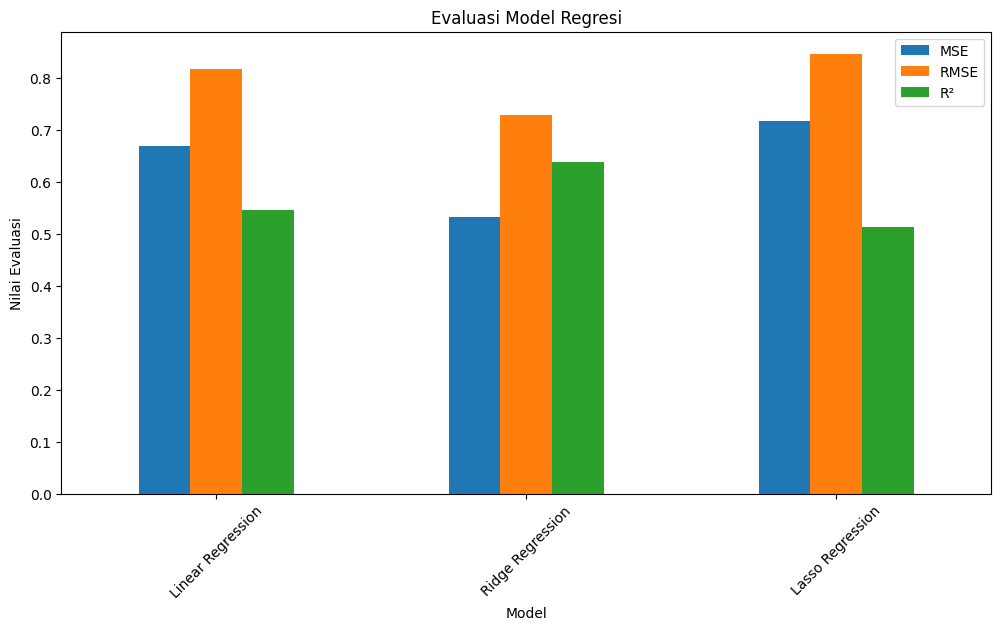

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import mglearn

# Memuat dataset
url = "https://raw.githubusercontent.com/KhalPrawira/Machine-Learning-Course/refs/heads/main/01.%20Week%201/Dataset/Automobile.csv"
df = pd.read_csv(url)

# Menghapus nilai yang hilang dan duplikat
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Memilih fitur dan target
X = df.drop(columns=["symboling"])
y = df["symboling"]

# Mengonversi variabel kategorikal menjadi variabel dummy
X = pd.get_dummies(X, drop_first=True)

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model regresi
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Melatih dan mengevaluasi setiap model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2}

# Menampilkan hasil evaluasi
print("Evaluasi Model:")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"Mean Squared Error (MSE): {metrics['MSE']}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']}")
    print(f"R-squared Score (R²): {metrics['R²']}")

# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))
metrics_df = pd.DataFrame(results).T
metrics_df[["MSE", "RMSE", "R²"]].plot(kind='bar', figsize=(12, 6))
plt.title("Evaluasi Model Regresi")
plt.xlabel("Model")
plt.ylabel("Nilai Evaluasi")
plt.xticks(rotation=45)
plt.legend()
plt.show()


"""
## Persamaan Matematika yang digunakan pada MSE, RMSE, dan R-Squared:

### 1. Mean Squared Error (MSE)
MSE mengukur rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Semakin kecil nilai MSE, semakin baik model.

**Rumus Matematis:**

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


### 2. Root Mean Squared Error (RMSE)
RMSE adalah akar kuadrat dari MSE. Ini memberikan gambaran tentang seberapa besar kesalahan prediksi dalam skala yang sama dengan variabel target.

**Rumus Matematis:**

$$
RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$


### 3. R-Squared (\( R^2 \))
R-squared mengukur seberapa baik variabilitas variabel target dapat dijelaskan oleh model. Nilainya berkisar antara 0 dan 1, di mana 1 menunjukkan model yang sempurna.

**Rumus Matematis:**

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
